In [5]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import ConcatDataset



root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")



LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

'''
def normalize_array(arr):
    """
    Normalize a 1D NumPy array to have values between 0 and 1.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr
'''


'''Obtain Dataset Images (image, label)'''


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)


# horizontal flip transform
transformHor = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    normalize,
])

# blur transform
transformBlur = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    normalize
])

transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])


args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'

image_trainset = OCTDataset(args, 'train', transform=transform2)
image_testset = OCTDataset(args, 'test', transform=transform2)

# create augment versions of the dataset
flip_trainset = OCTDataset(args, 'train', transform=transformHor)
blur_trainset = OCTDataset(args, 'train', transform=transformBlur)

In [6]:
'''
# count pictures in each class for TRAINING DATA
class_counts = {}
for _, label in image_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Training Data Class counts:", class_counts)
print()

# count pictures in each class for TESTING DATA
class_counts = {}
for _, label in image_testset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Testing Data Class counts:", class_counts)
print()

'''


""" For Class 0 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_0 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1
print("Flip Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_0))
print()
'''
""" For Class 2 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_2 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Flip Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_2))
print()
'''

""" For Class 0 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_0 = Subset(blur_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_0:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_0))
print()
'''

""" For Class 2 Blur"""

labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_2 = Subset(blur_trainset, indices)


'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_2))
print()
'''

# New Dataset with extra class 2 images
concatenated_dataset = ConcatDataset([image_trainset, blur_trainset_class_2])
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in concatenated_dataset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Concated Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in concatenated_dataset:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(concatenated_dataset))


Concated Data Class 2 counts: {2: 9408, 1: 11760, 0: 7788}
Number of classes: 3 Total Length 28956


# Untrained Alexnet 2D With Validation Set Random State = 0

In [9]:
balanced_accuracy_random_states = []

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')





Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.077
[1,   200] loss: 0.955
[1,   300] loss: 0.845
Train accuracy after epoch 1: 51.97 %
Validation accuracy after epoch 1: 61.46 %
Train loss after epoch 1: 0.14
Validation loss after epoch 1: 0.76
[2,   100] loss: 0.754
[2,   200] loss: 0.739
[2,   300] loss: 0.684
Train accuracy after epoch 2: 64.80 %
Validation accuracy after epoch 2: 65.47 %
Train loss after epoch 2: 0.12
Validation loss after epoch 2: 0.72
[3,   100] loss: 0.652
[3,   200] loss: 0.644
[3,   300] loss: 0.604
Train accuracy after epoch 3: 69.77 %
Validation accuracy after epoch 3: 71.77 %
Train loss after epoch 3: 0.10
Validation loss after epoch 3: 0.58
[4,   100] loss: 0.585
[4,   200] loss: 0.586
[4,   300] loss: 0.560
Train accuracy after epoch 4: 72.49 %
Validation accuracy after epoch 4: 72.46 %
Train loss after epoch 4: 0.10
Validation loss after epoch 4: 0.57
[5,   100] loss: 0.552
[5,   200] loss: 0.555
[5,   300] loss: 0.527
Train accuracy after epoch 5: 73.89 %
Valida

Balanced accuracy: 0.36443552607147073
Accuracy of the network on the 7987 test images: 43 %
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.33      0.34      2548
           1       0.50      0.63      0.56      3920
           2       0.30      0.14      0.19      1519

    accuracy                           0.44      7987
   macro avg       0.38      0.36      0.36      7987
weighted avg       0.41      0.44      0.42      7987

Confusion matrix:
[[ 830 1618  100]
 [1066 2454  400]
 [ 481  823  215]]


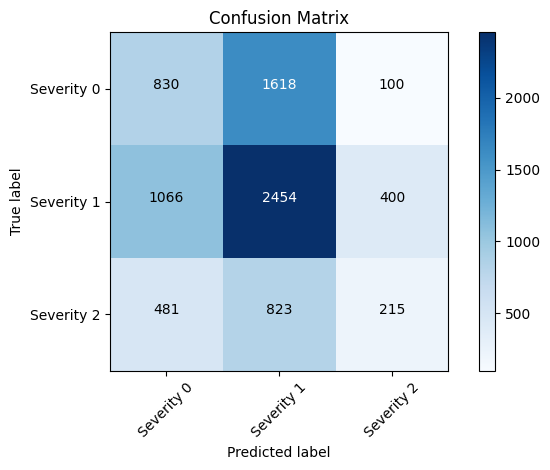

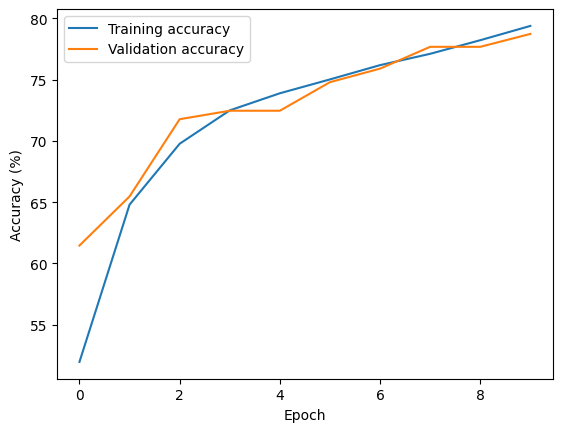

Train Accuracy:  [51.96857192194785, 64.79882576411673, 69.76774304955966, 72.49179761699189, 73.88620272837161, 75.01726817475392, 76.1828699706441, 77.10671731997928, 78.21619754791918, 79.38179934380936]
Validation Accuracy:  [61.46408839779006, 65.4696132596685, 71.771408839779, 72.46201657458563, 72.46201657458563, 74.79281767955801, 75.89779005524862, 77.6761049723757, 77.6761049723757, 78.7292817679558]



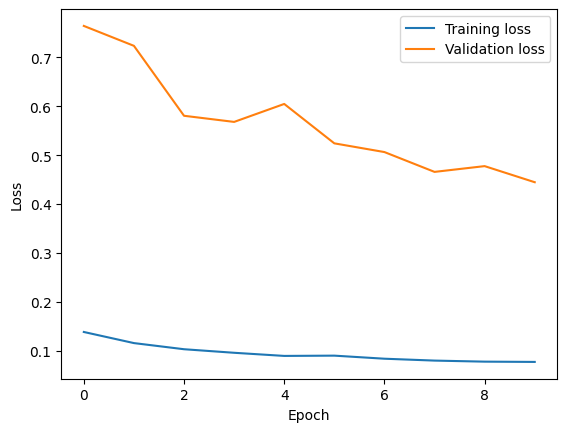

Train Losses:  [0.13807778776679908, 0.11533876002164177, 0.10277569211648972, 0.09549912727998765, 0.08908666052870988, 0.08964298311518042, 0.08335699774942346, 0.07950990293072073, 0.07735920866220695, 0.0767907275514708]
Validation Losses:  [0.7645280193228748, 0.7237633055086294, 0.5806141400205497, 0.5680587164934169, 0.6048175541076871, 0.5241755658750376, 0.50634254490473, 0.46575764447285983, 0.47756009767068686, 0.4446062425882118]



In [11]:
from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_accuracy_random_states)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()


# Random State = 10

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=10, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.087
[1,   200] loss: 1.049
[1,   300] loss: 0.970
Train accuracy after epoch 1: 47.09 %
Validation accuracy after epoch 1: 57.65 %
Train loss after epoch 1: 0.15
Validation loss after epoch 1: 0.87
[2,   100] loss: 0.821
[2,   200] loss: 0.778
[2,   300] loss: 0.740
Train accuracy after epoch 2: 61.92 %
Validation accuracy after epoch 2: 66.19 %
Train loss after epoch 2: 0.12
Validation loss after epoch 2: 0.69
[3,   100] loss: 0.674
[3,   200] loss: 0.656
[3,   300] loss: 0.632
Train accuracy after epoch 3: 69.19 %
Validation accuracy after epoch 3: 70.89 %
Train loss after epoch 3: 0.11
Validation loss after epoch 3: 0.61
[4,   100] loss: 0.591
[4,   200] loss: 0.590
[4,   300] loss: 0.574
Train accuracy after epoch 4: 72.23 %
Validation accuracy after epoch 4: 73.10 %
Train loss after epoch 4: 0.10
Validation loss after epoch 4: 0.57
[5,   100] loss: 0.564
[5,   200] loss: 0.552
[5,   300] loss: 0.547
Train accuracy after epoch 5: 73.92 %
Valida

In [ ]:
from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_accuracy_random_states)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()


# Random State = 20

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=20, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




In [ ]:
from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_accuracy_random_states)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()


# Random State = 30

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=30, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




In [ ]:
from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_accuracy_random_states)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()


# Random State = 40

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_accuracy_random_states)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()


# Untrained Alexnet with alphas = [0.001, 0.01, 0.1, 1]

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


0.0001
Beginning Training
[1,   100] loss: 1.082
[1,   200] loss: 1.012
[1,   300] loss: 0.859
Train accuracy after epoch 1: 50.02 %
Validation accuracy after epoch 1: 61.15 %
Train loss after epoch 1: 0.14
Validation loss after epoch 1: 0.78
[2,   100] loss: 0.771
[2,   200] loss: 0.749
[2,   300] loss: 0.697
Train accuracy after epoch 2: 64.11 %
Validation accuracy after epoch 2: 68.56 %
Train loss after epoch 2: 0.11
Validation loss after epoch 2: 0.65
[3,   100] loss: 0.644
[3,   200] loss: 0.637
[3,   300] loss: 0.595
Train accuracy after epoch 3: 69.94 %
Validation accuracy after epoch 3: 72.44 %
Train loss after epoch 3: 0.10
Validation loss after epoch 3: 0.57
[4,   100] loss: 0.572
[4,   200] loss: 0.559
[4,   300] loss: 0.553
Train accuracy after epoch 4: 73.10 %
Validation accuracy after epoch 4: 74.21 %
Train loss after epoch 4: 0.09
Validation loss after epoch 4: 0.54
[5,   100] loss: 0.518
[5,   200] loss: 0.526
[5,   300] loss: 0.528
Train accuracy after epoch 5: 74.86 %

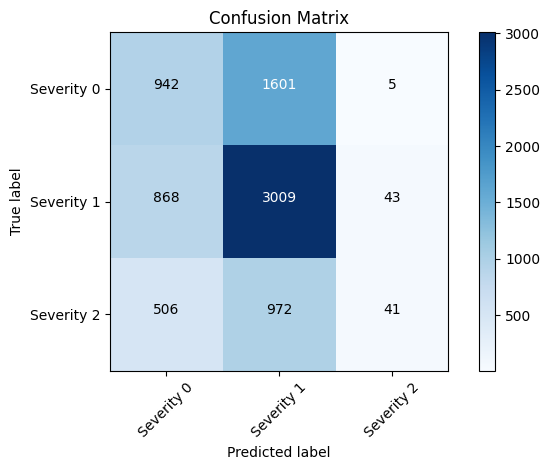

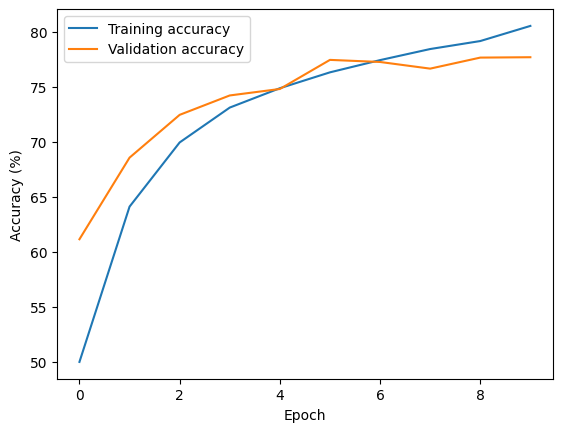

Train Accuracy:  [50.01726817475393, 64.11241581764807, 69.94042479709894, 73.10481782075635, 74.86185460196857, 76.30374719392161, 77.4132274218615, 78.41909860127784, 79.14436194094284, 80.51718183388016]
Validation Accuracy:  [61.15331491712707, 68.56008287292818, 72.44475138121547, 74.20580110497238, 74.79281767955801, 77.43439226519337, 77.24447513812154, 76.64019337016575, 77.64157458563535, 77.6761049723757]



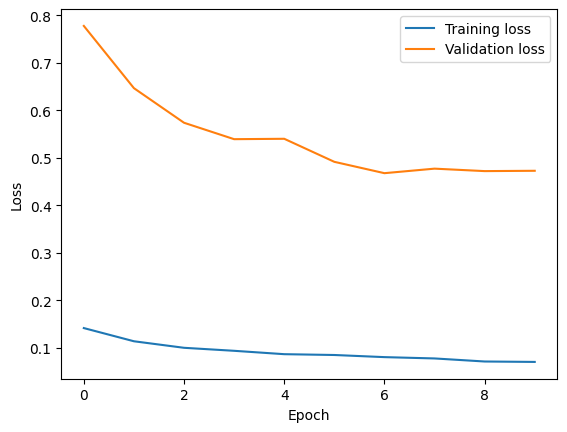

Train Losses:  [0.14147457924995632, 0.11369993237171384, 0.09995317096868273, 0.09362197424496077, 0.08651633544192129, 0.08479525593433591, 0.0803172792518995, 0.07754452394846395, 0.07110964642703863, 0.07022095187592901]
Validation Losses:  [0.777512238499868, 0.6464995221538439, 0.5736709177823357, 0.5391085302632158, 0.539929214597407, 0.4914294385778311, 0.46753351563248186, 0.4770691516649657, 0.4718868297766585, 0.4725714093743108]

Finished Training


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


0.001
Beginning Training
[1,   100] loss: 1.101
[1,   200] loss: 1.087
[1,   300] loss: 1.084
Train accuracy after epoch 1: 40.13 %
Validation accuracy after epoch 1: 40.61 %
Train loss after epoch 1: 0.19
Validation loss after epoch 1: 1.08
[2,   100] loss: 1.085
[2,   200] loss: 1.085
[2,   300] loss: 1.083
Train accuracy after epoch 2: 40.61 %
Validation accuracy after epoch 2: 40.61 %
Train loss after epoch 2: 0.19
Validation loss after epoch 2: 1.08
[3,   100] loss: 1.086
[3,   200] loss: 1.085
[3,   300] loss: 1.087
Train accuracy after epoch 3: 40.61 %
Validation accuracy after epoch 3: 40.61 %
Train loss after epoch 3: 0.18
Validation loss after epoch 3: 1.09
[4,   100] loss: 1.085
[4,   200] loss: 1.083
[4,   300] loss: 1.085
Train accuracy after epoch 4: 40.61 %
Validation accuracy after epoch 4: 40.61 %
Train loss after epoch 4: 0.19
Validation loss after epoch 4: 1.08
[5,   100] loss: 1.083
[5,   200] loss: 1.085
[5,   300] loss: 1.084
Train accuracy after epoch 5: 40.51 %


c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


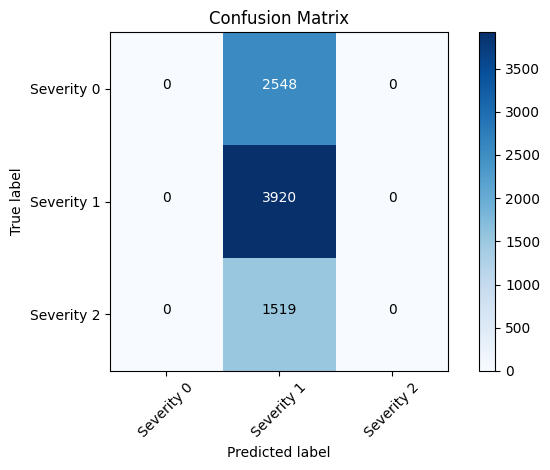

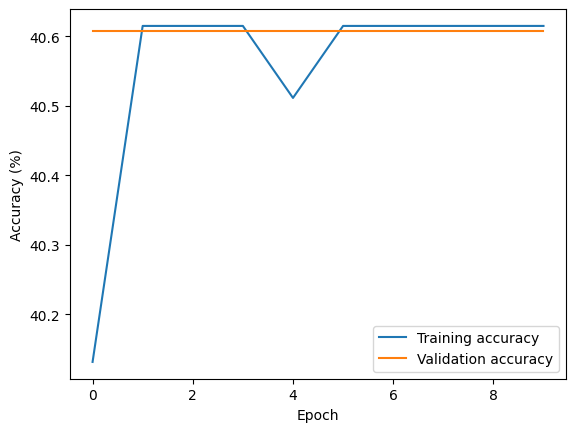

Train Accuracy:  [40.13123812812986, 40.61474702123986, 40.61474702123986, 40.61474702123986, 40.511137972716284, 40.61474702123986, 40.61474702123986, 40.61474702123986, 40.61474702123986, 40.61474702123986]
Validation Accuracy:  [40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836, 40.607734806629836]



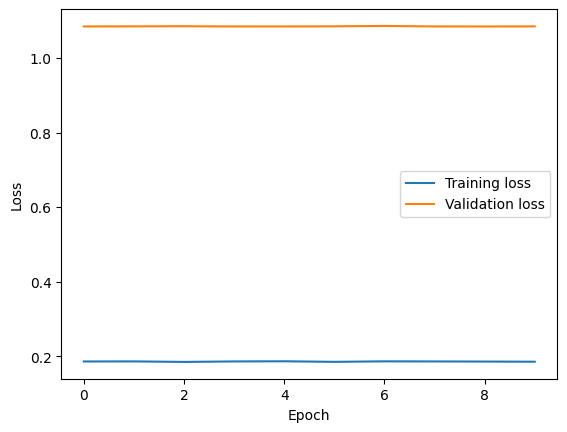

Train Losses:  [0.18598042305003212, 0.18621541584394255, 0.18481100922790022, 0.1861401048813077, 0.1865179574950624, 0.18502767309958104, 0.18637224192118776, 0.1861114060681169, 0.18578134584163433, 0.1853599959974131]
Validation Losses:  [1.08452383128319, 1.084820402261302, 1.0850572460922747, 1.0845077327601818, 1.0844570266607716, 1.08483605621928, 1.085911881857814, 1.084550418906449, 1.0844161951739486, 1.0846213227477521]

Finished Training


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


0.01
Beginning Training
[1,   100] loss: 5727.951
[1,   200] loss: 57.906
[1,   300] loss: 2.000
Train accuracy after epoch 1: 39.57 %
Validation accuracy after epoch 1: 40.61 %
Train loss after epoch 1: 0.25
Validation loss after epoch 1: 1.08
[2,   100] loss: 900.373
[2,   200] loss: 1.266
[2,   300] loss: 1.183
Train accuracy after epoch 2: 40.17 %
Validation accuracy after epoch 2: 40.61 %
Train loss after epoch 2: 0.19
Validation loss after epoch 2: 1.08
[3,   100] loss: 1.086
[3,   200] loss: 1.097
[3,   300] loss: 1.088
Train accuracy after epoch 3: 40.36 %
Validation accuracy after epoch 3: 40.54 %
Train loss after epoch 3: 0.19
Validation loss after epoch 3: 1.09
[4,   100] loss: 1.178
[4,   200] loss: 1.101
[4,   300] loss: 1.198
Train accuracy after epoch 4: 39.83 %
Validation accuracy after epoch 4: 40.61 %
Train loss after epoch 4: 2.26
Validation loss after epoch 4: 1.09
[5,   100] loss: 1.092
[5,   200] loss: 1.201
[5,   300] loss: 4.804
Train accuracy after epoch 5: 40.

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


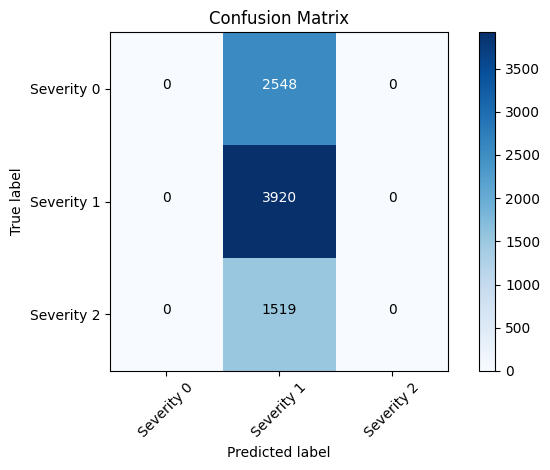

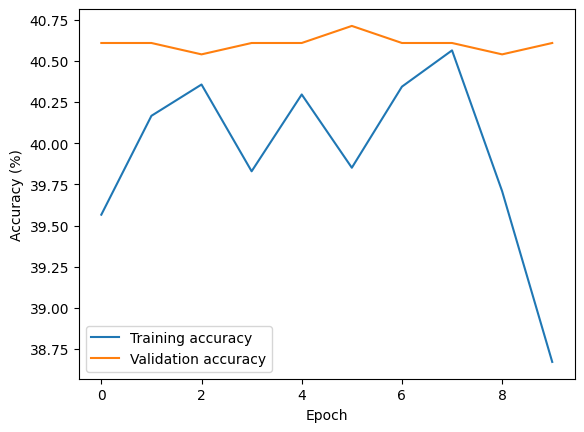

Train Accuracy:  [39.5657054049387, 40.16577447763771, 40.35572439993093, 39.82904506993611, 40.295285788292176, 39.85063028837852, 40.34277326886548, 40.56294249697807, 39.70816784665861, 38.6720773614229]
Validation Accuracy:  [40.607734806629836, 40.607734806629836, 40.53867403314917, 40.607734806629836, 40.607734806629836, 40.71132596685083, 40.607734806629836, 40.607734806629836, 40.53867403314917, 40.607734806629836]



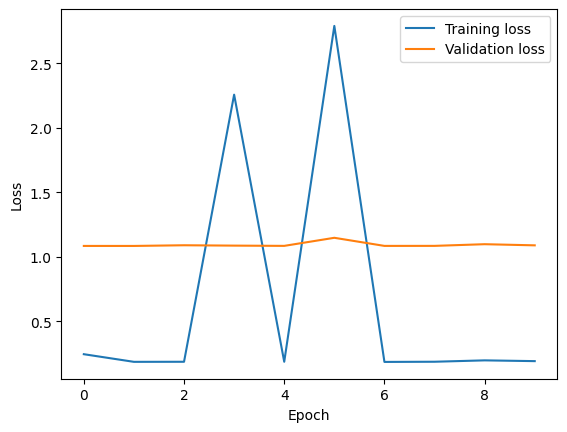

Train Losses:  [0.24511007610605567, 0.18587370900159383, 0.18642480300934933, 2.2572946255378303, 0.18661591986924903, 2.790155307693376, 0.18525235988817162, 0.18667912516146076, 0.19730249557705873, 0.19137453670659776]
Validation Losses:  [1.084485336561888, 1.0844385716137965, 1.0896920156742327, 1.086923669056339, 1.0849315461532845, 1.1475641226900217, 1.0847474066592053, 1.0849837044984596, 1.097895551781628, 1.0890531095351963]

Finished Training


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


0.1
Beginning Training
[1,   100] loss: 13416106465.401
[1,   200] loss: 20.288
[1,   300] loss: 1.443
Train accuracy after epoch 1: 34.40 %
Validation accuracy after epoch 1: 34.82 %
Train loss after epoch 1: 0.21
Validation loss after epoch 1: 1.19
[2,   100] loss: 1.222
[2,   200] loss: 1.362
[2,   300] loss: 1.270
Train accuracy after epoch 2: 35.65 %
Validation accuracy after epoch 2: 30.61 %
Train loss after epoch 2: 0.22
Validation loss after epoch 2: 1.15
[3,   100] loss: 1.219
[3,   200] loss: 1.245
[3,   300] loss: 1.271
Train accuracy after epoch 3: 35.48 %
Validation accuracy after epoch 3: 40.61 %
Train loss after epoch 3: 0.21
Validation loss after epoch 3: 1.15
[4,   100] loss: 1.454
[4,   200] loss: 1.322
[4,   300] loss: 1.412
Train accuracy after epoch 4: 35.66 %
Validation accuracy after epoch 4: 40.61 %
Train loss after epoch 4: 0.25
Validation loss after epoch 4: 1.11
[5,   100] loss: 12846.367
[5,   200] loss: 17.385
[5,   300] loss: 9.662
Train accuracy after epo

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


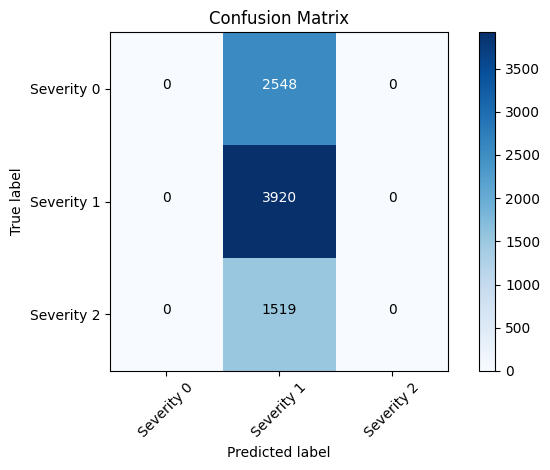

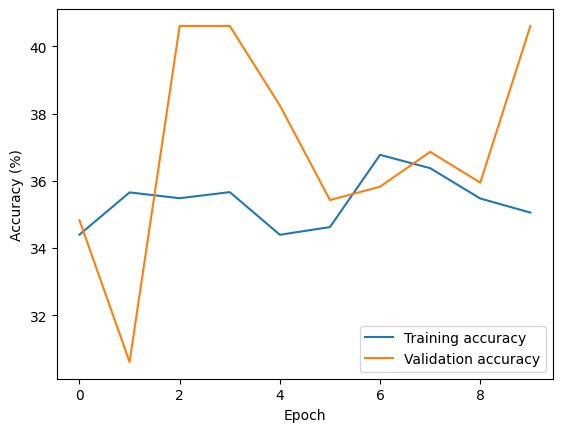

Train Accuracy:  [34.39820410982559, 35.65446382317389, 35.481782075634605, 35.66309791055085, 34.39388706613711, 34.62269038162666, 36.772578138490765, 36.37541011915041, 35.473147988257644, 35.05439475047488]
Validation Accuracy:  [34.82389502762431, 30.611187845303867, 40.607734806629836, 40.607734806629836, 38.24240331491713, 35.42817679558011, 35.825276243093924, 36.86118784530387, 35.94613259668508, 40.607734806629836]



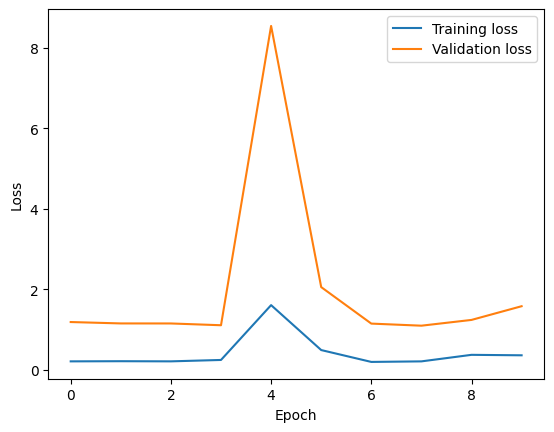

Train Losses:  [0.2114791112710099, 0.2154018803196059, 0.21169863715356227, 0.24627213155367098, 1.6079015929395981, 0.492054864517233, 0.19753207817920665, 0.21116883945728535, 0.3735336160791513, 0.361986810660494]
Validation Losses:  [1.1879370324519458, 1.1534433503177284, 1.1525760204093891, 1.1083866179977333, 8.541435067824896, 2.0554969179037528, 1.1491197716465313, 1.097371581509627, 1.240546642746056, 1.5808311700820923]

Finished Training


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


1
Beginning Training
[1,   100] loss: 184497429189912160.000
[1,   200] loss: 620004832564510.875
[1,   300] loss: 222330350742764256.000
Train accuracy after epoch 1: 37.58 %
Validation accuracy after epoch 1: 40.59 %
Train loss after epoch 1: 6088686629158.26
Validation loss after epoch 1: 8877298427848.25
[2,   100] loss: 10346730065757.070
[2,   200] loss: 907359182562.238
[2,   300] loss: 177824703867.933
Train accuracy after epoch 2: 37.23 %
Validation accuracy after epoch 2: 32.49 %
Train loss after epoch 2: 0.20
Validation loss after epoch 2: 35516196039.14
[3,   100] loss: 15214743901.190
[3,   200] loss: 12136829420.600
[3,   300] loss: 118649106924.580
Train accuracy after epoch 3: 37.54 %
Validation accuracy after epoch 3: 40.59 %
Train loss after epoch 3: 38064252.66
Validation loss after epoch 3: 1967795537683.39
[4,   100] loss: 9493476475.934
[4,   200] loss: 24786000938.051
[4,   300] loss: 21064900936.775
Train accuracy after epoch 4: 37.86 %
Validation accuracy after

KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

raw_train_dataset = concatenated_dataset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

alphas = [0.0001, 0.001, 0.01, 0.1, 1]

list_train_acc = []
list_val_acc = []

list_train_losses = []
list_val_losses = []

for alpha in alphas: 
    # Load pre-trained AlexNet model
    alexnet = models.alexnet(pretrained=False)
    # Replace last fully connected layer with a new one
    alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
    alexnet.classifier[6] = nn.Linear(4096, num_classes)
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(alexnet.parameters(), lr=alpha, weight_decay=gamma)

    print(alpha)
    
    train_acc = []
    val_acc = []

    train_losses = []
    val_losses = []

    # Train the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    alexnet.to(device)
    print("Beginning Training")
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = alexnet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0
        
        # Evaluate the model on the validation set after each epoch
        correct_val = 0
        total_val = 0
        train_loss = running_loss / len(train_loader)
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = alexnet(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                # calculates validation loss
                val_loss += criterion(outputs, labels).item() * inputs.size(0)
            val_loss /= len(val_dataset)

        # save accuracies and print
        train_accuracy = 100 * correct_train / total_train
        train_acc.append(train_accuracy)
        val_accuracy = 100 * correct_val / total_val
        val_acc.append(val_accuracy)
        print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
        print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

        # save losses and print
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
        print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))



    # Perform Tests

    alexnet.eval()
    total_correct = 0
    total_images = 0
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            true_labels += labels.tolist()
            predicted_labels += predicted.tolist()
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()



    #get balanced accuracy and regular accuracy
    balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
    print("Balanced accuracy:", balanced_acc)
    print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

    # calculate recall, precision, and F1 score
    report = classification_report(true_labels, predicted_labels)
    print("Classification Report:")
    print(report)

    # create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion matrix:")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
    plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Add numbers to the confusion matrix
    thresh = cm.max() / 2.
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()



    # Plot the training and validation accuracy
    plt.plot(train_acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()
    print("Train Accuracy: ", train_acc)
    print("Validation Accuracy: ", val_acc)
    print()


    # Plot losses
    plt.plot(range(epochs), train_losses, label='Training loss')
    plt.plot(range(epochs), val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print("Train Losses: ", train_losses)
    print("Validation Losses: ", val_losses)
    print()


    print('Finished Training')
    list_train_acc.append(train_acc)
    list_val_acc.append(val_acc)

    list_train_losses.append(train_losses)
    list_val_losses.append(val_losses)
    





## Untrained Alexnet with Meta Data

In [ ]:
# Load your training and validation dataset with metadata
train_loader = DataLoader(image_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(image_testset, batch_size=64, shuffle=False)

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)

# Replace last fully connected layer with a new one
num_classes = 3 # number of classes in your dataset
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096 + len(metadata_o_train), num_classes) # Add metadata to the input of the last fully connected layer

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001, weight_decay=.001)

# Train the model with both image and metadata
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels, meta) in enumerate(train_loader, 0):
        #inputs_image, inputs_metadata = inputs['image'].to(device), inputs['metadata'].to(device) # Separate image and metadata inputs
        inputs_image = inputs.to(device)
        inputs_metadata = meta.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs_image, inputs_metadata) # Pass both image and metadata inputs to the model
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on test data with image only
alexnet.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs_image = inputs['image'].to(device) # Use image inputs only
        labels = labels.to(device)
        outputs = alexnet(inputs_image)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ValueError: could not convert string to float: ''